In [1]:
import math as m
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

In [47]:
def mi_sqrt(num):
    num_str , PE = str(num) , str(int(num))
    LT , LPE = len(num_str) , len(PE)
    PD = num_str[LPE+1:]
    LPD = len(PD)
    cic_ent , cic_dec = int(LPE/2) + LPE%2 , int(LPD/2) + LPD%2 
    seg_PE , seg_PD = np.zeros(cic_ent) , np.zeros(cic_dec)
    for i in range(cic_ent):
        if i == 0:
            seg_PE[cic_ent-1] = PE[-2*i-2::]
        else:
            seg_PE[cic_ent-i-1] = PE[-2*i-2:-2*i]
    for i in range(cic_dec):
        seg_PD[i] = float(PD[2*i:2*i+2])
    if LPD%2 == 1:
        seg_PD[-1] = seg_PD[-1]*10
    # Aqui viene lo bueno
    j = 0
    while j**2 <= seg_PE[0]:
        j += 1
    j += -1
    raiz = str(j)
    residuo = seg_PE[0] - j**2
    print(raiz)
    for i in range(cic_ent-1):
        j , residuo = 0 , residuo*100+seg_PE[i+1]
        aproximacion = (20*float(raiz)+j)*j
        while aproximacion <= residuo:
            j +=1
            aproximacion = (20*float(raiz)+j)*j
        if j == 0:
            residuo += -(20*float(raiz)+j)*j
            raiz += str(j)
        else:
            residuo += -(20*float(raiz)+(j-1))*(j-1)
            raiz += str(j-1)
        print(raiz)
    # parte decimal
    for i in range(cic_dec):
        j , residuo = 0 , residuo*100+seg_PD[i]
        aproximacion = (20*float(raiz)+j)*j
        while aproximacion <= residuo:
            j += 1
            aproximacion = (20*float(raiz)+j)*j
        if j == 0:
            residuo += -(20*float(raiz)+(j))*(j)
            raiz += str(j)
        else:
            residuo += -(20*float(raiz)+(j-1))*(j-1)
            raiz += str(j-1)
        print(float(raiz)/(10**(i+1)))    
    return float(raiz)/(10**cic_dec)

In [52]:
mi_sqrt(120941233.1239842310)

1
10
109
1099
10997
10997.3
10997.32
10997.328
10997.3284


10997.3284

In [53]:
np.sqrt(120941233.1239842310)

10997.328453946633

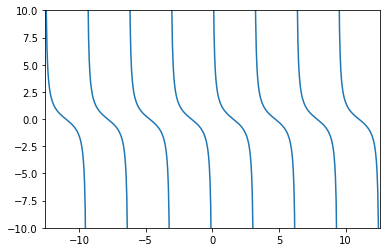

In [23]:
x = np.linspace(-4*np.pi,4*np.pi,500)
y = 1/np.tan(x)
y[:-1][np.diff(y)>0 ] = np.nan
plt.plot(x,y)
plt.xlim(x[0],x[-1]),plt.ylim(-10,10)
plt.show()

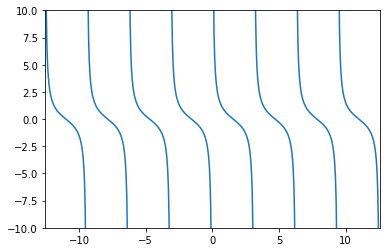

In [26]:
def my_cot(x):
    m_cot = 1/np.tan(x)
    for i in range(len(x)-1):
        if m_cot[i+1] - m_cot[i] > 0:
            m_cot[i+1] = np.nan
    return m_cot

m_y = my_cot(x)
plt.plot(x,m_y)
plt.xlim(x[0],x[-1]),plt.ylim(-10,10)
plt.show()

In [27]:
def f_cuadrado(x):
    y = np.zeros_like(x)
    for i in range(len(x)):
        if int(x[i])%2 == 0:
            y[i] = 1.0
    return y

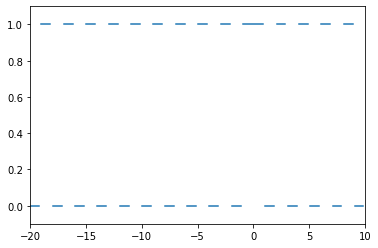

In [29]:
x = np.linspace(-20,10,300)
y = f_cuadrado(x)
y[:-1][ abs(np.diff(y)) > 1e-2] = np.nan
plt.plot(x,y)
plt.xlim(x[0],x[-1]),plt.ylim(-0.1,1.1)
plt.show()

In [33]:
def f_serie(x,N=10):
    y = np.zeros_like(x)
    for n in range(N+1):
        y += ((-1)**n/(2*n+1)**2)*np.sin((2*n+1)*x)
    return y

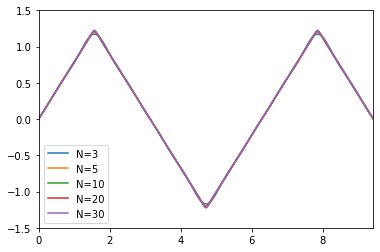

In [39]:
x = np.linspace(0,3*np.pi,300)
numeros = [3,5,10,20,30]
for ni in numeros:
    y = f_serie(x,ni)
    plt.plot(x,y,label='N=%d' %ni)
plt.xlim(x[0],x[-1]),plt.ylim(-1.5,1.5)
plt.legend()
plt.show()

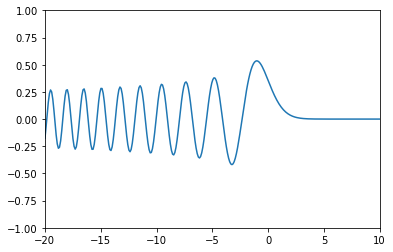

In [41]:
x = np.linspace(-20,10,300)
y = sp.airy(x)
plt.plot(x,y[0])
plt.xlim(x[0],x[-1]),plt.ylim(-1,1)
plt.show()

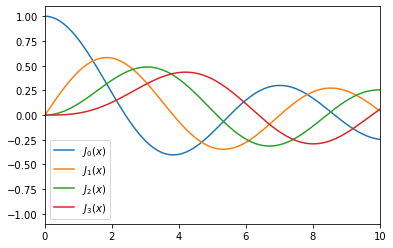

In [44]:
x = np.linspace(0,10,300)
for n in range(4):
    y = sp.jv(n,x)
    plt.plot(x,y,label=r'$J_{%d} (x)$' %n )
plt.xlim(x[0],x[-1]),plt.ylim(-1.1,1.1)
plt.legend()
plt.show()

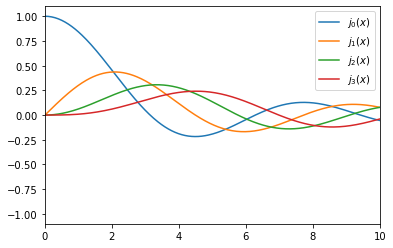

In [45]:
x = np.linspace(0,10,300)
for n in range(4):
    y = sp.spherical_jn(n,x)
    plt.plot(x,y,label=r'$j_{%d} (x)$' %n )
plt.xlim(x[0],x[-1]),plt.ylim(-1.1,1.1)
plt.legend()
plt.show()